# Maternal Health Risk Evaluation
In this dataset we were given 1013 instances and 7 features.

Dataset link: [https://archive.ics.uci.edu/dataset/863/maternal+health+risk](https://archive.ics.uci.edu/dataset/863/maternal+health+risk)

On the basis of 6 features which included:  
1. Age  
2. SystolicBP  
3. DiastolicBP  
4. BS (Blood Sugar)  
5. BodyTemp  
6. HeartRate  

We were given the task to analyze and classify RiskLevel (low, mid, high) on the basis of these 6 features. For this task, we proceeded as per the index below:

## Index
1. Importing and Initial overview of Dataset  
2. Exploratory Data Analysis  
3. Distribution of Risk levels  
4. Identification of Outliers  
5. Removal of Outliers  
6. Feature Selection  
7. Data Preprocessing  
8. Model Training on Selected Machine Learning Classification Algorithms  
9. Confusion matrix plot with final model used  
10. Inferences
11. References

### Importing and Initial overview of Dataset

In [27]:
import pandas as pd

file_path = 'Maternal Health Risk Data Set.csv'
data = pd.read_csv(file_path)

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


(   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
 0   25         130           80  15.0      98.0         86  high risk
 1   35         140           90  13.0      98.0         70  high risk
 2   29          90           70   8.0     100.0         80  high risk
 3   30         140           85   7.0      98.0         70  high risk
 4   35         120           60   6.1      98.0         76   low risk,
 None)

### Exploratory Data Analysis

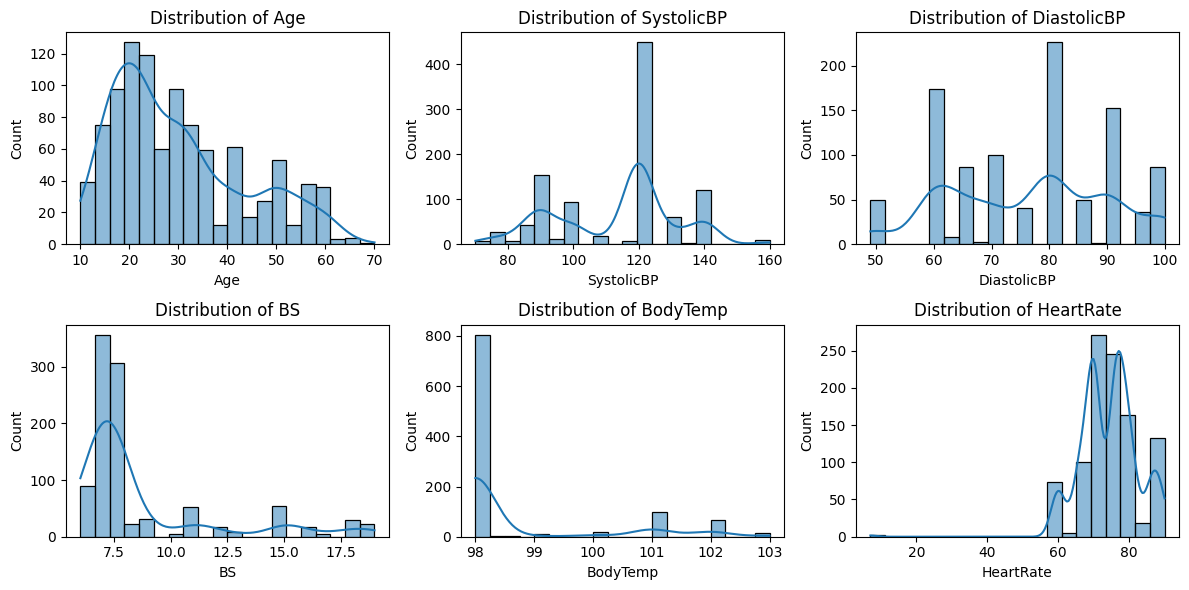

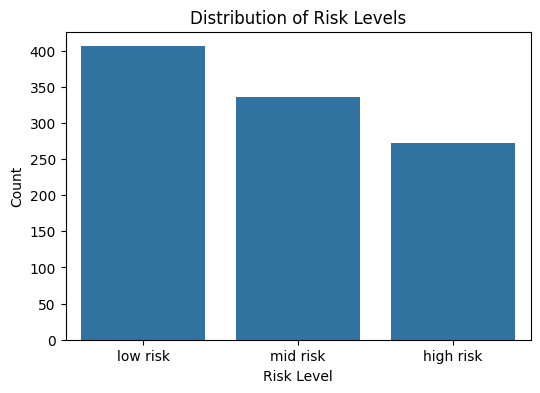

(               Age   SystolicBP  ...     BodyTemp    HeartRate
 count  1014.000000  1014.000000  ...  1014.000000  1014.000000
 mean     29.871795   113.198225  ...    98.665089    74.301775
 std      13.474386    18.403913  ...     1.371384     8.088702
 min      10.000000    70.000000  ...    98.000000     7.000000
 25%      19.000000   100.000000  ...    98.000000    70.000000
 50%      26.000000   120.000000  ...    98.000000    76.000000
 75%      39.000000   120.000000  ...    98.000000    80.000000
 max      70.000000   160.000000  ...   103.000000    90.000000
 
 [8 rows x 6 columns],
 RiskLevel
 low risk     406
 mid risk     336
 high risk    272
 Name: count, dtype: int64)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

summary_stats = data.describe()
risk_level_distribution = data['RiskLevel'].value_counts()

# Plot the distribution of features
plt.figure(figsize=(12, 6))

for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='RiskLevel', order=risk_level_distribution.index)
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

summary_stats, risk_level_distribution


### Identification of Outliers

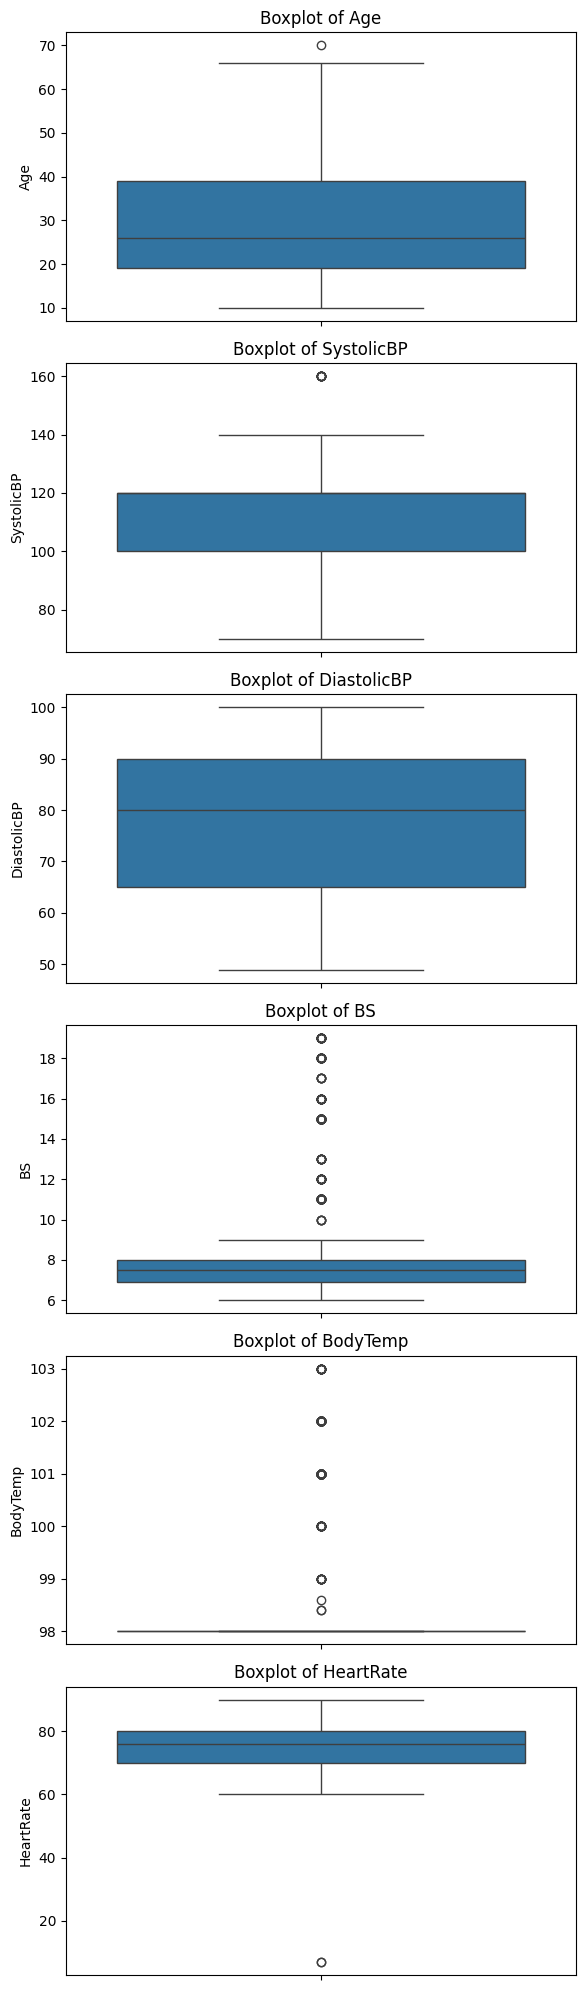

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 20))

data_cleaned = data.copy()

for i, column in enumerate(data_cleaned[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']], 1):
    plt.subplot(6, 1, i)
    sns.boxplot(data=data_cleaned, y=column)
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


### Removal of Outliers

In [30]:
def remove_outliers(data):
  for col in data.columns:
    if col not in ['RiskLevel']:
      data[col] = data[col].astype(float)
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      data[col] = data[col].clip(lower=Q1 - 1.5*IQR , upper = Q3 + 1.5*IQR)

remove_outliers(data_cleaned)

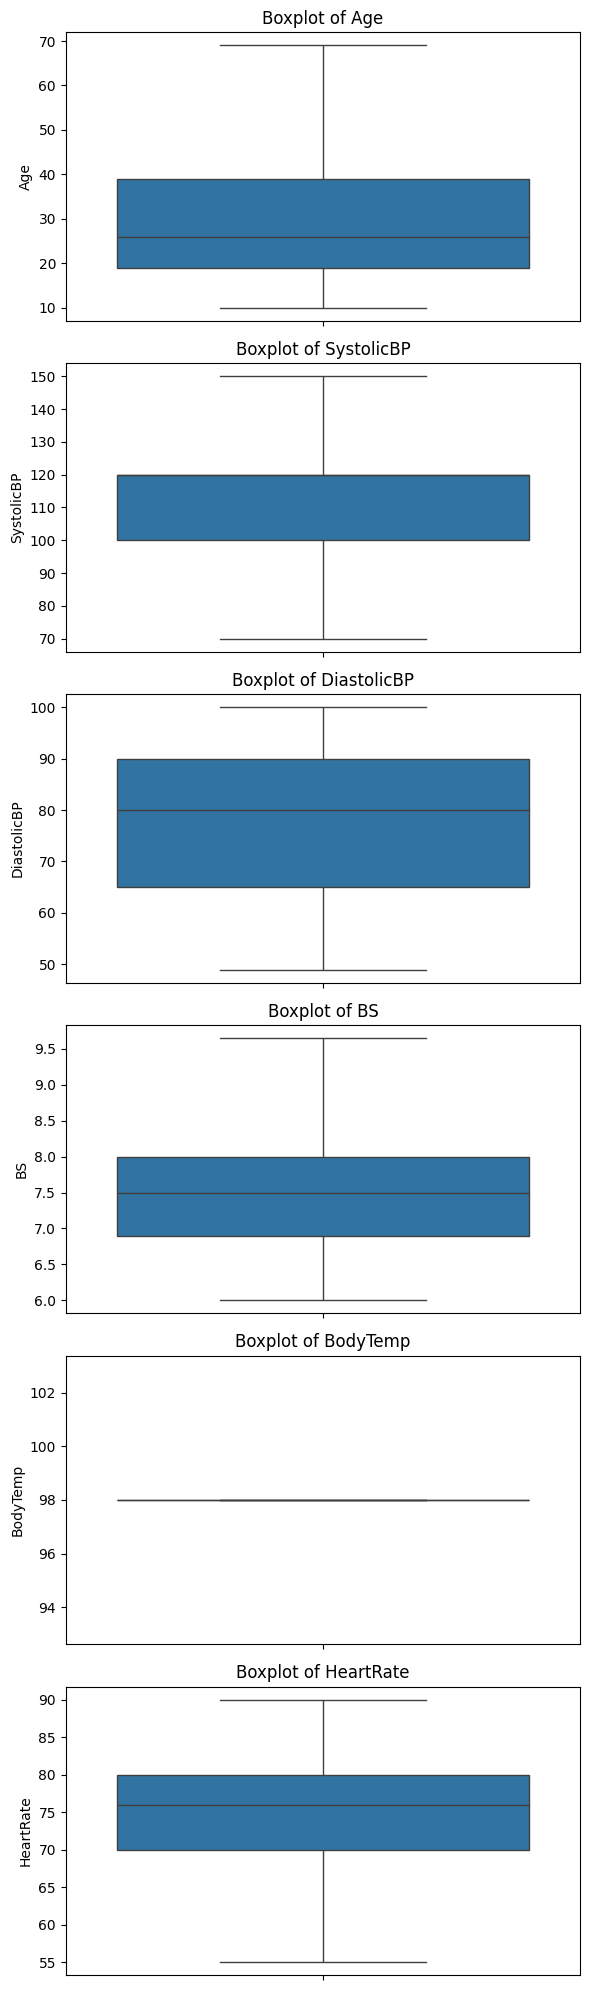

In [50]:
plt.figure(figsize=(6, 20))

for i, column in enumerate(data_cleaned[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']], 1):
    plt.subplot(6, 1, i)
    sns.boxplot(data=data_cleaned, y=column)
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
data_cleaned = data_cleaned[(data_cleaned['HeartRate'] > 40) & (data_cleaned['HeartRate'] <= 90)]

# Custom mapping for RiskLevel encoding
risk_level_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}

data_cleaned['RiskLevelEncoded'] = data_cleaned['RiskLevel'].map(risk_level_mapping)

cleaned_summary_stats = data_cleaned.describe()

# The risk_level_encoded_classes is now derived from the mapping
risk_level_encoded_classes = risk_level_mapping

cleaned_summary_stats, risk_level_encoded_classes

(               Age   SystolicBP  ...    HeartRate  RiskLevelEncoded
 count  1014.000000  1014.000000  ...  1014.000000       1014.000000
 mean     29.870809   113.099606  ...    74.396450          0.867850
 std      13.471482    18.178042  ...     7.563788          0.807353
 min      10.000000    70.000000  ...    55.000000          0.000000
 25%      19.000000   100.000000  ...    70.000000          0.000000
 50%      26.000000   120.000000  ...    76.000000          1.000000
 75%      39.000000   120.000000  ...    80.000000          2.000000
 max      69.000000   150.000000  ...    90.000000          2.000000
 
 [8 rows x 7 columns],
 {'low risk': 0, 'mid risk': 1, 'high risk': 2})

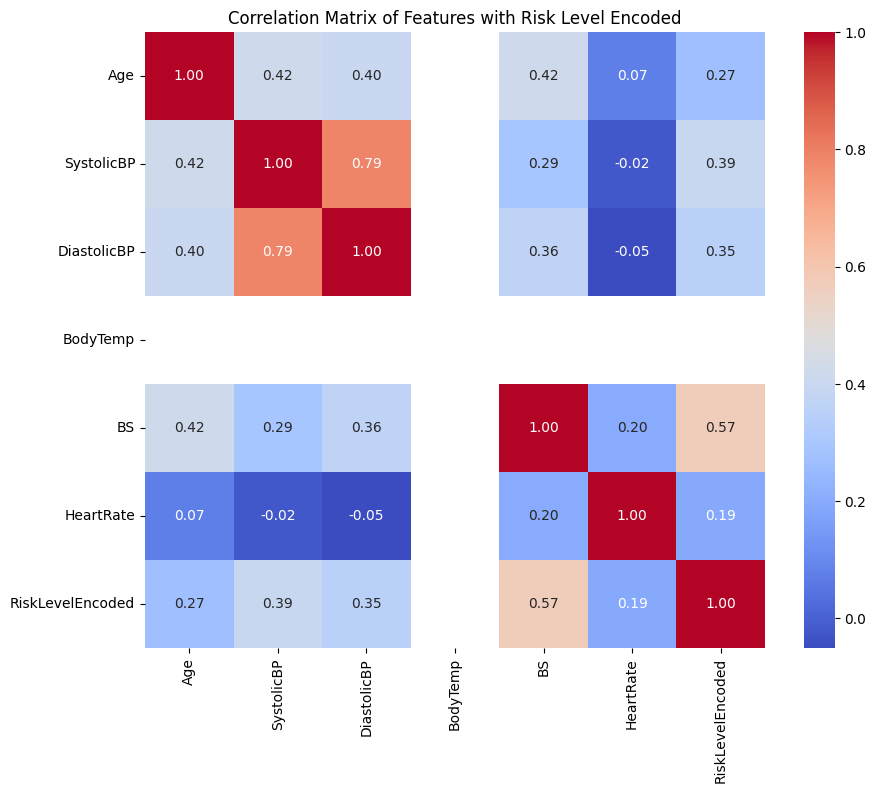

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data_cleaned[['Age', 'SystolicBP', 'DiastolicBP','BodyTemp', 'BS', 'HeartRate', 'RiskLevelEncoded']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f" ,cbar = True)
plt.title('Correlation Matrix of Features with Risk Level Encoded')
plt.show()

### Feature Selection: Removal of BodyTemp

As observed from the correlation matrix above, the feature **BodyTemp** does not have any significant effect on the target variable **RiskLevelEncoded**. Therefore, the feature **BodyTemp** has been removed as part of the feature selection process.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_cleaned[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']]
y = data_cleaned['RiskLevelEncoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((811, 5), (203, 5), (811,), (203,))

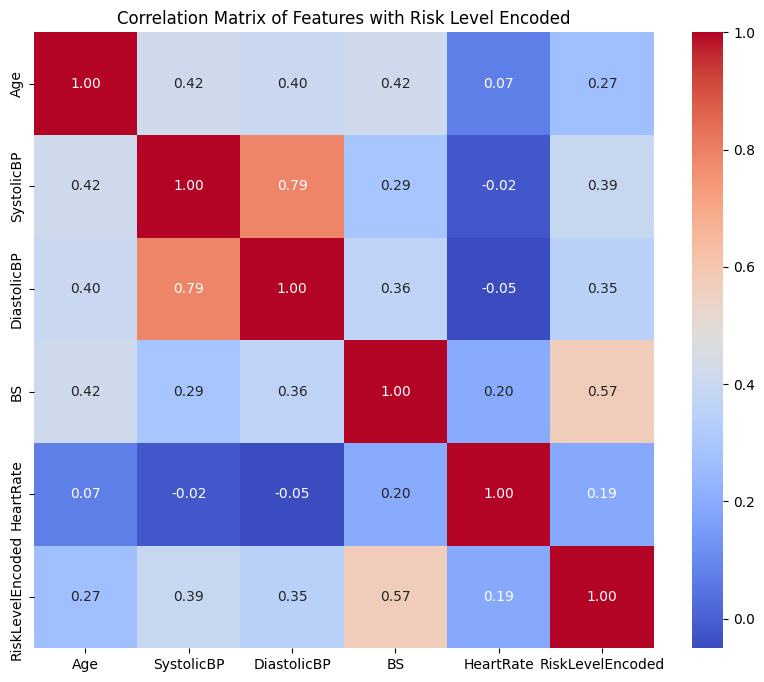

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data_cleaned[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'RiskLevelEncoded']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f" ,cbar = True)
plt.title('Correlation Matrix of Features with Risk Level Encoded')
plt.show()

### Data Preprocessing

Preparing data so that it can be trained on Classification Models

In [36]:
from sklearn.preprocessing import LabelEncoder

data_cleaned = data_cleaned[(data_cleaned['HeartRate'] > 40) & (data_cleaned['HeartRate'] <= 90)]

encoder = LabelEncoder()
data_cleaned['RiskLevelEncoded'] = encoder.fit_transform(data_cleaned['RiskLevel'])

cleaned_summary_stats = data_cleaned.describe()
risk_level_encoded_classes = dict(zip(encoder.classes_, range(len(encoder.classes_))))

cleaned_summary_stats, risk_level_encoded_classes

(               Age   SystolicBP  ...    HeartRate  RiskLevelEncoded
 count  1014.000000  1014.000000  ...  1014.000000       1014.000000
 mean     29.870809   113.099606  ...    74.396450          1.063116
 std      13.471482    18.178042  ...     7.563788          0.772146
 min      10.000000    70.000000  ...    55.000000          0.000000
 25%      19.000000   100.000000  ...    70.000000          0.000000
 50%      26.000000   120.000000  ...    76.000000          1.000000
 75%      39.000000   120.000000  ...    80.000000          2.000000
 max      69.000000   150.000000  ...    90.000000          2.000000
 
 [8 rows x 7 columns],
 {'high risk': 0, 'low risk': 1, 'mid risk': 2})

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_cleaned[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = data_cleaned['RiskLevelEncoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((811, 6), (203, 6), (811,), (203,))

### Model Training on Selected Machine Learning Classification Algorithms

The model is now being trained using a set of selected machine learning classification algorithms.


#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Recall Score: {recall_logreg}")
print("Confusion Matrix:")
print(conf_matrix_logreg)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Results:
Accuracy: 0.6157635467980296
Recall Score: 0.617832275212043
Confusion Matrix:
[[43  5  7]
 [ 3 59 19]
 [ 8 36 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        55
           1       0.59      0.73      0.65        81
           2       0.47      0.34      0.40        67

    accuracy                           0.62       203
   macro avg       0.62      0.62      0.61       203
weighted avg       0.61      0.62      0.60       203



#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Recall Score: {recall_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Random Forest Results:
Accuracy: 0.8571428571428571
Recall Score: 0.8631924552322562
Confusion Matrix:
[[50  1  4]
 [ 0 66 15]
 [ 2  7 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.89      0.81      0.85        81
           2       0.75      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.86      0.86       203
weighted avg       0.87      0.86      0.86       203



#### KNN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("K-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_knn}")
print(f"Recall Score: {recall_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Results:
Accuracy: 0.7192118226600985
Recall Score: 0.720364507429184
Confusion Matrix:
[[42  6  7]
 [ 1 60 20]
 [ 2 21 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        55
           1       0.69      0.74      0.71        81
           2       0.62      0.66      0.64        67

    accuracy                           0.72       203
   macro avg       0.75      0.72      0.73       203
weighted avg       0.73      0.72      0.72       203



#### XGBoost Classifier

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train an XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Recall Score: {recall_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)

XGBoost Results:
Accuracy: 0.8669950738916257
Recall Score: 0.8722828059478142
Confusion Matrix:
[[50  0  5]
 [ 2 67 12]
 [ 2  6 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.92      0.83      0.87        81
           2       0.78      0.88      0.83        67

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203



#### Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt}")
print(f"Recall Score: {recall_dt}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report_dt)

Decision Tree Results:
Accuracy: 0.8522167487684729
Recall Score: 0.8638278863817835
Confusion Matrix:
[[52  1  2]
 [ 3 62 16]
 [ 2  6 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.90      0.77      0.83        81
           2       0.77      0.88      0.82        67

    accuracy                           0.85       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.85      0.85       203



#### Support Vector Classifier (SVC)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc, average='macro')
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

print("Support Vector Classifier Results:")
print(f"Accuracy: {accuracy_svc}")
print(f"Recall Score: {recall_svc}")
print("Confusion Matrix:")
print(conf_matrix_svc)
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Support Vector Classifier Results:
Accuracy: 0.6798029556650246
Recall Score: 0.6700615888012239
Confusion Matrix:
[[45  7  3]
 [ 0 76  5]
 [ 3 47 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.87        55
           1       0.58      0.94      0.72        81
           2       0.68      0.25      0.37        67

    accuracy                           0.68       203
   macro avg       0.73      0.67      0.65       203
weighted avg       0.71      0.68      0.65       203



#### Voting Classiifer (Soft Voting)

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
        ('logreg', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='soft'
)

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting, average='macro')
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
class_report_voting = classification_report(y_test, y_pred_voting)

print("Voting Model with Decision Tree Results:")
print(f"Accuracy: {accuracy_voting}")
print(f"Recall Score: {recall_voting}")
print("-------------------------")
print("Confusion Matrix:")
print(conf_matrix_voting)
print("-------------------------")
print("Classification Report:")
print(class_report_voting)

Voting Model with Decision Tree Results:
Accuracy: 0.8817733990147784
Recall Score: 0.8904646241296325
-------------------------
Confusion Matrix:
[[53  1  1]
 [ 0 67 14]
 [ 2  6 59]]
-------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.91      0.83      0.86        81
           2       0.80      0.88      0.84        67

    accuracy                           0.88       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.88      0.88       203



#### Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print(f"Recall Score: {recall_nb}")
print("-------------------------")
print("Confusion Matrix:")
print(conf_matrix_nb)
print("-------------------------")
print("Classification Report:")
print(class_report_nb)

Naive Bayes Results:
Accuracy: 0.6059113300492611
Recall Score: 0.6067965447733276
-------------------------
Confusion Matrix:
[[42  5  8]
 [ 0 59 22]
 [ 4 41 22]]
-------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        55
           1       0.56      0.73      0.63        81
           2       0.42      0.33      0.37        67

    accuracy                           0.61       203
   macro avg       0.63      0.61      0.61       203
weighted avg       0.61      0.61      0.60       203



#### Stacking Classifier

In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define base learners
base_learners = [
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

meta_learner = LogisticRegression(max_iter=1000)

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

stack_model.fit(X_train, y_train)


y_pred_stack = stack_model.predict(X_test)

accuracy_stack = accuracy_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack, average='macro')
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack)

print("Stacking Model Results:")
print(f"Accuracy: {accuracy_stack}")
print(f"Recall Score: {recall_stack}")
print("Confusion Matrix:")
print(conf_matrix_stack)
print("Classification Report:")
print(class_report_stack)

Stacking Model Results:
Accuracy: 0.8374384236453202
Recall Score: 0.8424320596791576
Confusion Matrix:
[[50  1  4]
 [ 0 67 14]
 [ 2 12 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.84      0.83      0.83        81
           2       0.75      0.79      0.77        67

    accuracy                           0.84       203
   macro avg       0.85      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203



#### Stacking with Naive Bayes

In [47]:
base_learners = [
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('nb', GaussianNB())
]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=1000), cv=5)
stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack, average='macro')
print(f"Stacking Accuracy (with Naive Bayes): {accuracy_stack}")
print(f"Recall Score Stacking (with Naive Bayes): {recall_stack}")

Stacking Accuracy (with Naive Bayes): 0.8620689655172413
Recall Score Stacking (with Naive Bayes): 0.8686187468940371


#### Voting Ensemble of SVM, RandomForest, Decision Tree, Naive Bayes Classifiers

Final Model

In [ ]:
voting_model = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('nb', GaussianNB())
    ],
    voting='soft'
)

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting, average='macro')
print(f"Voting Accuracy (with Naive Bayes): {accuracy_voting}")
print(f"Recall Score (with Naive Bayes): {recall_voting}")  

conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
class_report_voting = classification_report(y_test, y_pred_voting)
print("-------------------------")
print("Confusion Matrix:")
print(conf_matrix_voting)
print("-------------------------")
print("Classification Report:")
print(class_report_voting)

Voting Accuracy (with Naive Bayes): 0.896551724137931
Recall Score (with Naive Bayes): 0.9047556828651356
-------------------------
Confusion Matrix:
[[54  1  0]
 [ 0 69 12]
 [ 2  6 59]]
-------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.91      0.85      0.88        81
           2       0.83      0.88      0.86        67

    accuracy                           0.90       203
   macro avg       0.90      0.90      0.90       203
weighted avg       0.90      0.90      0.90       203



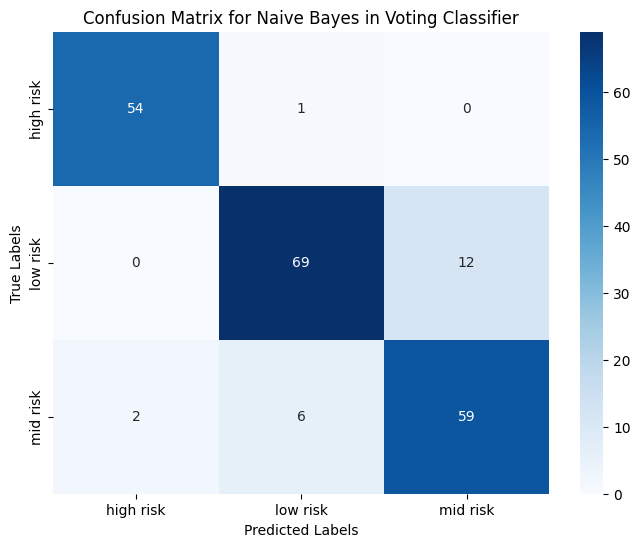

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix_voting_nb = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting_nb, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix for Naive Bayes in Voting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 📊 Performance Summary of the Models Applied

Below is a summary of the performance of various machine learning models applied to the dataset. In addition to **accuracy**, we evaluated each model using the **macro-averaged recall**, which offers a more balanced and fair measure of performance across all classes — especially in datasets with potential class imbalance.

🔍 It is evident that the **Voting Classifier with Naive Bayes** achieved the **highest macro recall score of 90.47%**, making it the most effective at correctly identifying all risk categories in a balanced manner.

📈 This reinforces the strength of **ensemble methods**, which not only delivered high accuracy (**89.65%**) but also demonstrated consistent and reliable performance across all risk levels — a critical requirement for healthcare-related predictive modeling.

### 📌 Why Recall Was Chosen as the Evaluation Metric

In the context of **maternal health risk prediction**, **recall** (specifically, *macro-averaged recall*) was chosen as the primary evaluation metric over accuracy. 

This decision is grounded in the critical nature of healthcare applications, where the cost of **false negatives** — failing to identify a high-risk patient — can lead to severe consequences, including delayed diagnosis and lack of timely medical intervention.

Unlike **accuracy**, which can be misleading in the presence of **class imbalance**, **recall provides a more meaningful measure** of how well the model detects each class, especially minority or high-risk categories.

 ✅ **A high recall score ensures that more true cases of maternal health risk are correctly identified**, making it a more suitable and responsible metric in medical prediction tasks.


<div align = "center">

| Model                                                               | Accuracy | Recall (Macro) |
|---------------------------------------------------------------------|----------|--------------------|
| Logistic Regression                                                 | 61.57    | 61.78              |
| Random Forest                                                       | 85.71    | 86.31              |
| KNN Classifier                                                      | 71.92    | 72.03              |
| XGBoost Classifier                                                  | 86.69    | 87.22              |
| Decision Tree Classifier                                            | 85.22    | 86.38              |
| Support Vector Classifier                                           | 67.98    | 67.00              |
| Voting Classifier - Soft Voting (SVM, RF, LR, DT)                   | 88.17    | 89.04              |
| Naive Bayes                                                         | 60.59    | 60.67              |
| Stacking Classifier                                                 | 83.74    | 84.24              |
| Stacking Classifier with Naive Bayes                                | 86.20    | 86.86              |
| Voting with Naive Bayes                                             | 89.65    | 90.47              |


### 🏅 Top Performing Model

The model that achieved the highest overall performance was the **Voting Classifier with Naive Bayes**, which attained an impressive **macro recall of 90.47%** and an **accuracy of 89.65%**.

🏆 This highlights its strong ability to **capture all classes effectively**, especially in a sensitive domain like maternal health. It showcases the power of **ensemble methods** in combining the strengths of multiple classifiers to deliver **more balanced, reliable, and robust predictions**.

### Inferences Drawn from the Analysis

1. **Feature Impact on Maternal Health Risk**:
   - **Age**: Older individuals tend to have higher maternal health risks, as indicated by patterns in the dataset.
   - **SystolicBP and DiastolicBP**: Elevated blood pressure levels are strongly associated with higher risk levels.
   - **Blood Sugar (BS)**: High blood sugar is a significant indicator of increased risk, especially for the "High Risk" category.
   - **Body Temperature**: This feature have minimal correlation with RiskLevel and were less impactful for prediction.

2. **Effectiveness of Data Preprocessing**:
   - Removing outliers improved the quality of the dataset, enhancing model reliability and reducing potential biases caused by extreme values.
   - Feature selection (removing BodyTemp) streamlined the dataset without compromising predictive performance.

3. **Modeling Insights**:
   - The analysis highlighted the importance of feature engineering and careful selection of predictors for improving classification accuracy.
   - Models performed better with refined data, showcasing the impact of robust preprocessing steps.
   - With the use of Voting Ensemble the overall efficiency of the model increased better than any other models we used.

4. **Correlation and Predictive Relationships**:
   - Strong correlations between certain features (e.g., blood pressure and blood sugar) and RiskLevel underscore their importance in identifying maternal health risks.

5. **Healthcare Implications**:
   - The analysis reaffirms that regular monitoring of critical health parameters like blood pressure and blood sugar is essential for early risk detection and intervention in maternal health.



## References

1. **Scikit-learn Documentation**  
   Scikit-learn: Machine Learning in Python. [https://scikit-learn.org](https://scikit-learn.org)

2. **Matplotlib Documentation**  
   Matplotlib: Visualization with Python. [https://matplotlib.org](https://matplotlib.org)

3. **Seaborn Documentation**  
   Seaborn: Statistical Data Visualization. [https://seaborn.pydata.org](https://seaborn.pydata.org)

4. **Pandas Documentation**  
   Pandas: Python Data Analysis Library. [https://pandas.pydata.org](https://pandas.pydata.org)

5. **CampusX YouTube Channel**  
   CampusX: Educational videos on machine learning and data science. [CampusX YouTube Channel](https://www.youtube.com/@CampusX-Official)

6. **Dataset Source**  
    https://archive.ics.uci.edu/dataset/863/maternal+health+risk